In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


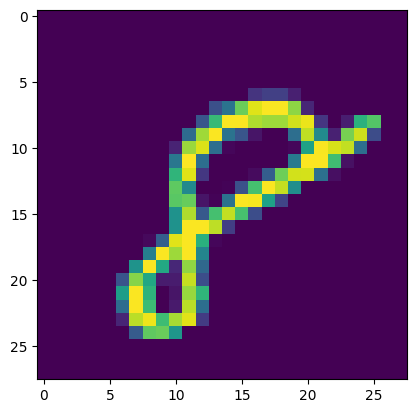

In [48]:
plt.imshow(x_train[59999])
plt.show()

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
model = keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(10,activation='softmax') #10 -> 0-9 classes(no of labels)
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0310 - accuracy: 0.9900
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0281 - accuracy: 0.9905
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0238 - accuracy: 0.9920
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0224 - accuracy: 0.9922
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0218 - accuracy: 0.9925
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0184 - accuracy: 0.9938
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0176 - accuracy: 0.9940
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0172 - accuracy: 0.9942
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0162 - accuracy: 0.9947
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

In [52]:
loss,accuracy=model.evaluate(x_test,y_test)
accuracy

313/313 [==============================] - 0s 1ms/step - loss: 0.3423 - accuracy: 0.9751


0.9750999808311462

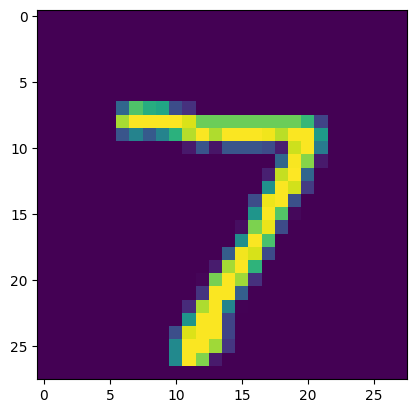

In [53]:
plt.imshow(x_test[0])
plt.show()

In [54]:
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [55]:
y_pred.shape

(10000, 10)

In [56]:
y_pred[0]

array([0.0000000e+00, 1.0932967e-25, 1.0559759e-24, 3.5453997e-24,
       2.0975242e-36, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01,
       2.0042040e-31, 5.5766542e-24], dtype=float32)

In [57]:
#model.predict gives the probabality of each class

#converting the probabilities to class label

label_1 = np.argmax(y_pred[0])
label_1

7

In [58]:
#converting for all 10000 test data points

y_predlabels = [np.argmax(i) for i in y_pred]

In [59]:
#confusion matrix
conf_mat = confusion_matrix(y_test,y_predlabels)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    1,    5,    1,    0,    0,    3,    1,    1,    0],
       [   1, 1123,    2,    3,    1,    0,    0,    2,    3,    0],
       [   2,    0, 1007,    7,    2,    1,    2,    8,    3,    0],
       [   1,    0,    7,  973,    0,   13,    0,    7,    4,    5],
       [   1,    1,    1,    1,  968,    0,    3,    3,    0,    4],
       [   6,    1,    1,   10,    0,  867,    4,    1,    2,    0],
       [   4,    4,    2,    1,    5,    4,  934,    0,    4,    0],
       [   1,    5,    9,    3,    0,    0,    0, 1000,    2,    8],
       [   4,    2,    9,   10,    1,    4,    0,    4,  937,    3],
       [   2,    3,    0,    3,    9,    5,    0,    9,    4,  974]],
      dtype=int32)>

Text(0.5, 47.7222222222222, 'predicted val')

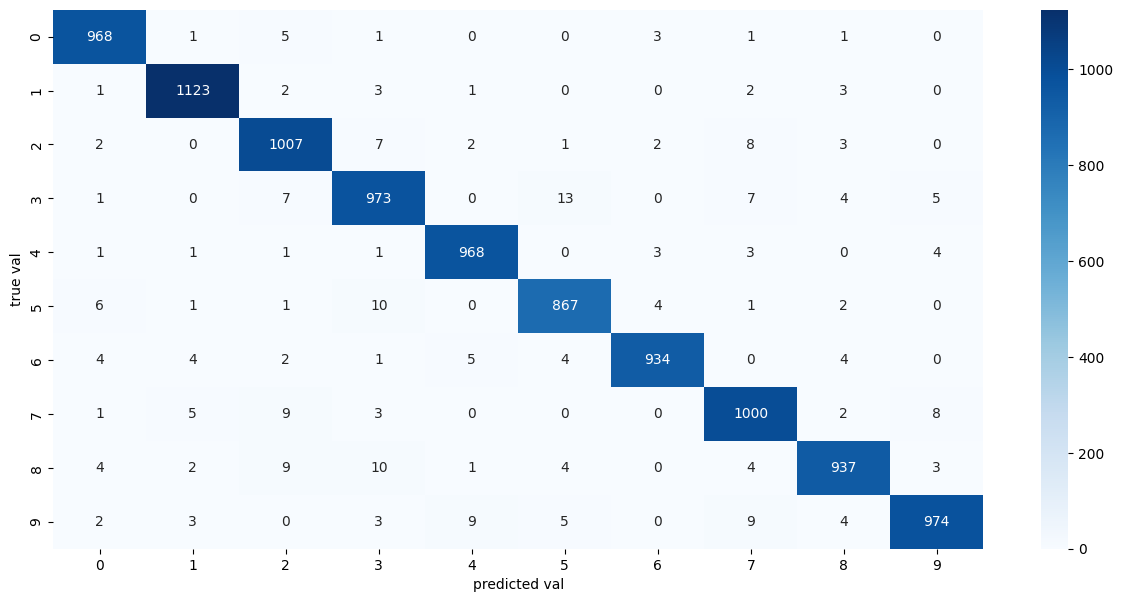

In [60]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('true val')
plt.xlabel('predicted val')

In [61]:
#predictive system

input_image =x_test[3]

In [62]:
input_image = input_image/255

In [63]:
input_image = np.reshape(input_image,[1,28,28])

In [68]:
pred = model.predict(input_image)

1/1 [==============================] - 0s 28ms/step


In [69]:
pred

array([[0.02842403, 0.00074068, 0.02068564, 0.00267035, 0.2025178 ,
        0.22895335, 0.04530391, 0.34965032, 0.1047635 , 0.01629039]],
      dtype=float32)

In [70]:
finalp = np.argmax(pred)

In [71]:
finalp

7